# UBER DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [2]:
data = pd.read_csv(r'C:\Users\harsh\Desktop\LAB ML\Uber Drives - .csv')

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Checking For Null Values

In [3]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [4]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
#Now dropping null values
data = data.dropna()

In [7]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [8]:
#Changing format to date time
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format ="%m/%d/%Y %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format ="%m/%d/%Y %H:%M")

In [9]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

# Adding Additional Columns

In [10]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday  

In [11]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


# Categories We Have

In [12]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

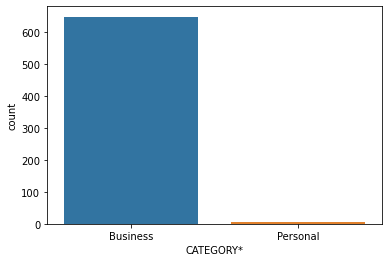

In [13]:
sns.countplot(x='CATEGORY*', data = data)

# How long do people travel with Uber?

Text(0.5, 1.0, 'DISTANCE VS CUSTOMERS')

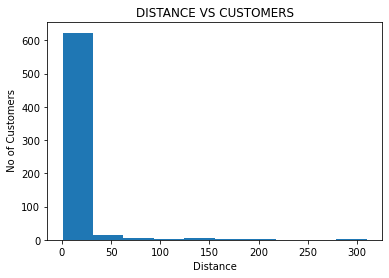

In [14]:
data['MILES*'].plot.hist()

plt.xlabel('Distance')
plt.ylabel(' No of Customers')
plt.title('DISTANCE VS CUSTOMERS') 

# What Hour Do Most People Take Uber To Their Destination?

Text(0.5, 1.0, 'Number of trips Vs Hours')

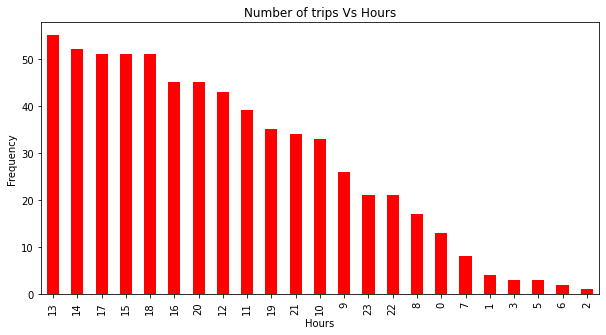

In [15]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'red', figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs Hours')

# Check The Purpose Of Trips

Text(0.5, 1.0, 'Purpose Vs Frequency')

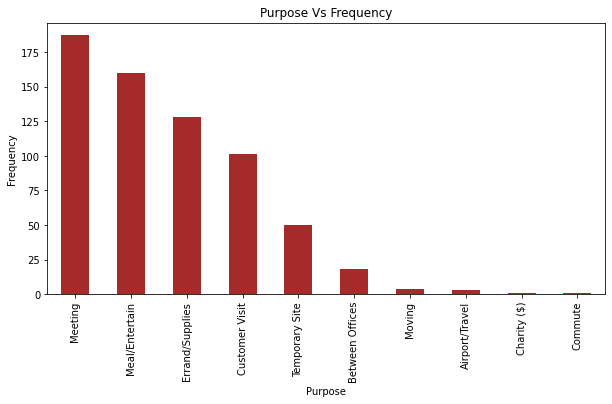

In [16]:
data['PURPOSE*'].value_counts().plot(kind ='bar',figsize=(10,5),color='brown')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose Vs Frequency')

# Which Day Has The Highest Number Of Trips

<AxesSubplot:>

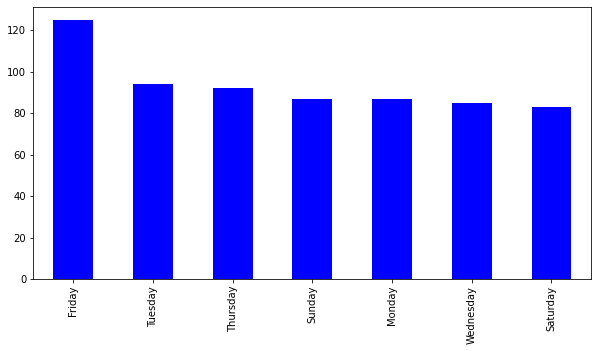

In [17]:
data['WEEKDAY'].value_counts().plot(kind='bar', color='blue',figsize=(10,5))

# What Are The Number Of Trips Per Each Day?

Text(0.5, 1.0, 'Frequency vs Day')

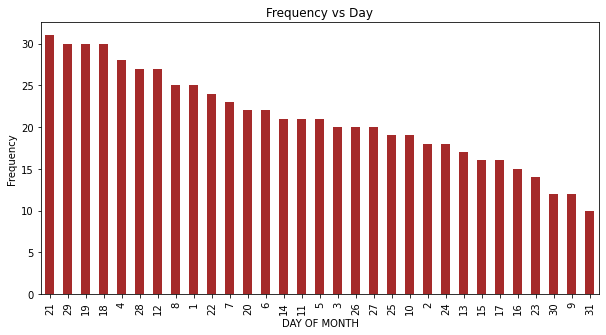

In [18]:
data['DAY'].value_counts().plot(kind = 'bar', color = 'brown', figsize = (10,5))
plt.xlabel('DAY OF MONTH')
plt.ylabel('Frequency')
plt.title('Frequency vs Day')

# What Are The Trips In The Month

Text(0.5, 1.0, 'Frequency vs Month')

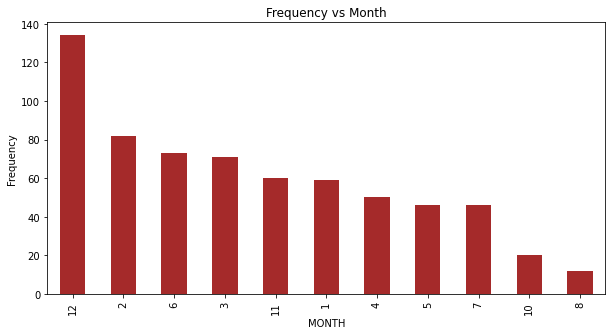

In [19]:
data['MONTH'].value_counts().plot(kind='bar', color='brown',figsize=(10,5))
plt.xlabel('MONTH')
plt.ylabel('Frequency')
plt.title('Frequency vs Month')

# The starting points of trips. Where Do People Start Boarding Their Trip From Most?

<AxesSubplot:>

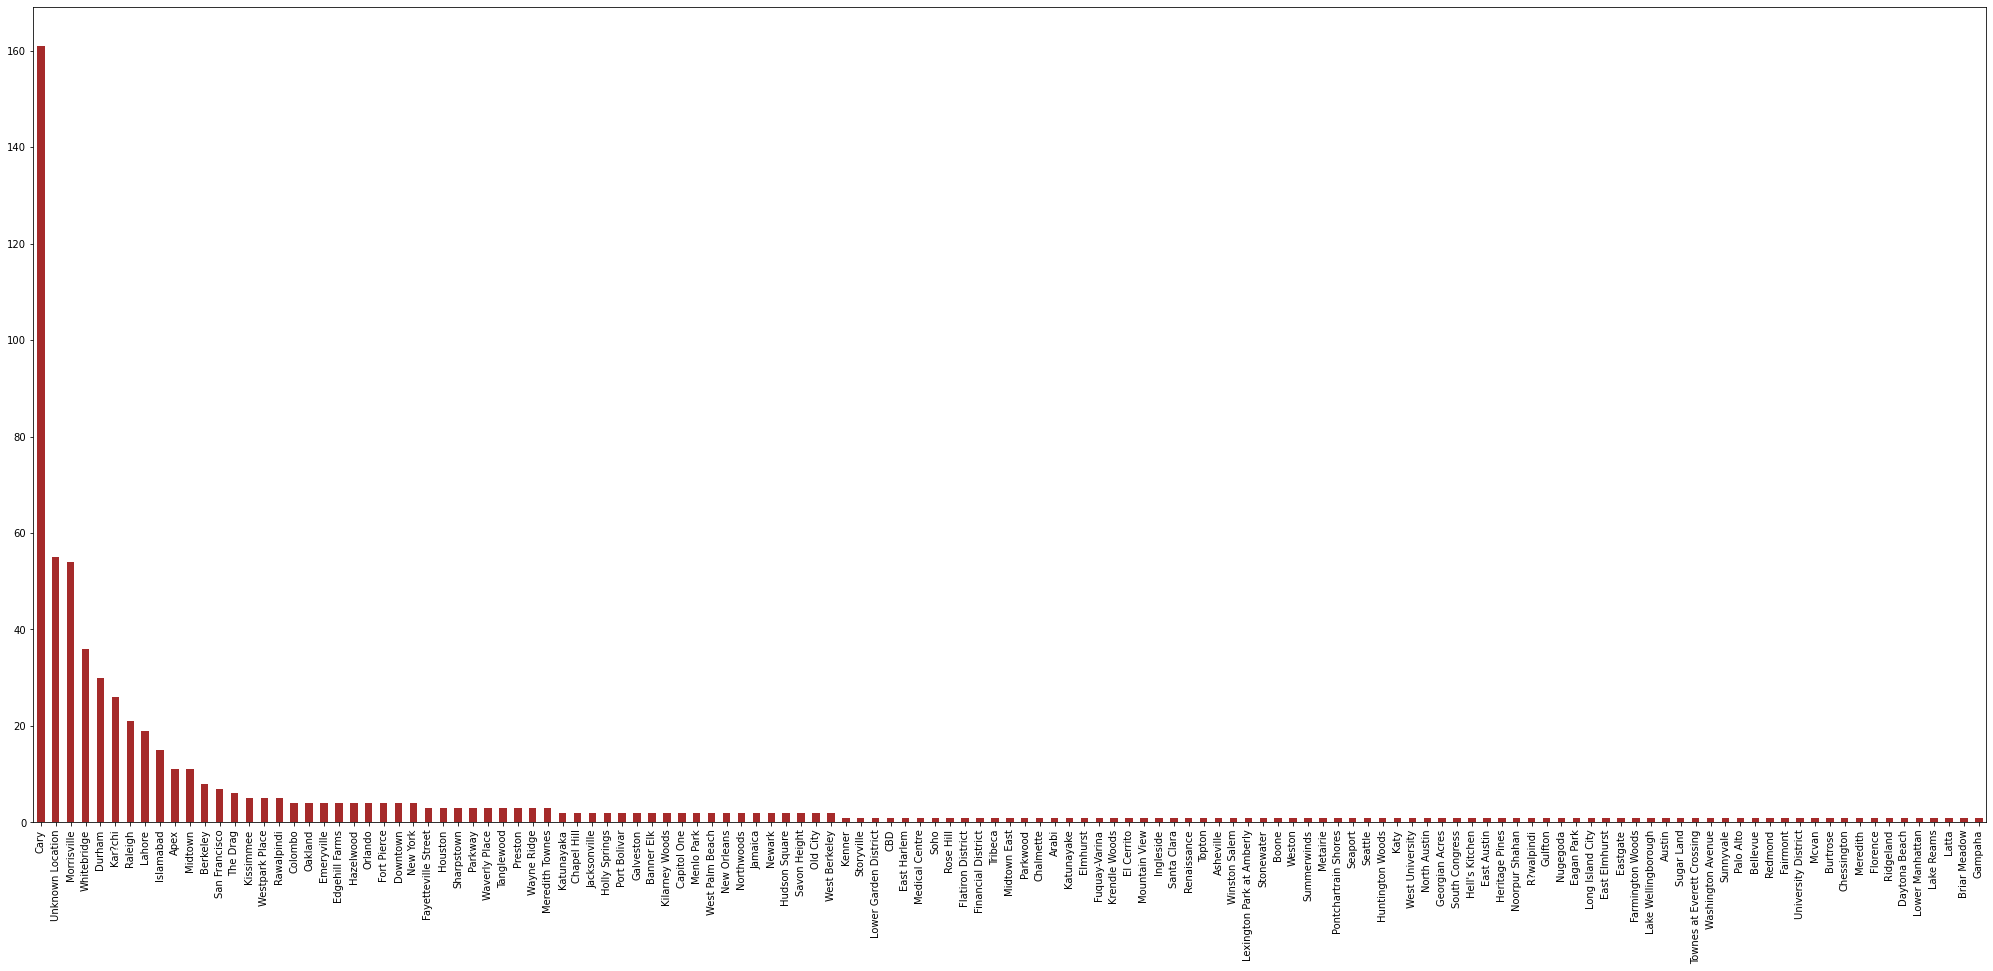

In [20]:
data['START*'].value_counts().plot(kind='bar', color='brown',figsize=(35,15))

# by - HARSHIT SHARMA